# Предварительный анализ тарифов компании «Мегалайн»

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов:**

**Тариф «Смарт»**
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета: *1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.*

**Тариф «Ультра»**
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета: *1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.*

Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файлов</a></span><ul class="toc-item"><li><span><a href="#Таблица-users" data-toc-modified-id="Таблица-users-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Таблица users</a></span></li><li><span><a href="#Таблица-calls" data-toc-modified-id="Таблица-calls-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Таблица calls</a></span></li><li><span><a href="#Таблица-messages" data-toc-modified-id="Таблица-messages-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Таблица messages</a></span></li><li><span><a href="#Таблица-internet" data-toc-modified-id="Таблица-internet-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Таблица internet</a></span></li><li><span><a href="#Таблица-tariffs" data-toc-modified-id="Таблица-tariffs-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Таблица tariffs</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Замена-типов-данных" data-toc-modified-id="Замена-типов-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Замена типов данных</a></span></li><li><span><a href="#Округление-величин" data-toc-modified-id="Округление-величин-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Округление величин</a></span></li><li><span><a href="#Добавление-данных" data-toc-modified-id="Добавление-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Добавление данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчеты-данных" data-toc-modified-id="Расчеты-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчеты данных</a></span><ul class="toc-item"><li><span><a href="#Создание-сводных-таблиц-по-звонкам,-сообщениям-и-трафику" data-toc-modified-id="Создание-сводных-таблиц-по-звонкам,-сообщениям-и-трафику-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание сводных таблиц по звонкам, сообщениям и трафику</a></span></li><li><span><a href="#Сведение-сводных-таблиц-в-одну-большую" data-toc-modified-id="Сведение-сводных-таблиц-в-одну-большую-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сведение сводных таблиц в одну большую</a></span></li><li><span><a href="#Подсчет-затрат-каждого-пользователя-тарифа" data-toc-modified-id="Подсчет-затрат-каждого-пользователя-тарифа-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Подсчет затрат каждого пользователя тарифа</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общие-затраты-пользователей-тарифов" data-toc-modified-id="Общие-затраты-пользователей-тарифов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общие затраты пользователей тарифов</a></span></li><li><span><a href="#Анализ-звонков,-трафика-и-сообщений-по-тарифам" data-toc-modified-id="Анализ-звонков,-трафика-и-сообщений-по-тарифам-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ звонков, трафика и сообщений по тарифам</a></span></li><li><span><a href="#Подсчет-среднего-и-пострение-графиков" data-toc-modified-id="Подсчет-среднего-и-пострение-графиков-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Подсчет среднего и пострение графиков</a></span></li><li><span><a href="#Вычисление-дисперсии-и-отклонения,-построение-графиков-распределения" data-toc-modified-id="Вычисление-дисперсии-и-отклонения,-построение-графиков-распределения-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вычисление дисперсии и отклонения, построение графиков распределения</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются" data-toc-modified-id="Средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются</a></span></li><li><span><a href="#Cредняя-выручка-пользователи-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов" data-toc-modified-id="Cредняя-выручка-пользователи-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Cредняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файлов

Для начала импортируем библиотеки, необходимые для дальнецшего анализа.

In [1]:
import pandas as pd
import math
import warnings
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
warnings.simplefilter('ignore')

В данных к анализу, мы имеем пять таблиц:
* users (информация о пользователях)
* calls (информация о звонках)
* messages (информация о сообщениях)
* internet (информация об интернет-сессиях)
* tariffs (информация о тарифах)

Прочитаем соответствующие таблицы поочередно, запишем их данные в переменные.

In [2]:
try:
    users = pd.read_csv('../4 project/users.csv')
    calls = pd.read_csv('../4 project/calls.csv')
    messages = pd.read_csv('../4 project/messages.csv')
    internet = pd.read_csv('../4 project/internet.csv')
    tariffs = pd.read_csv('../4 project/tariffs.csv')
except: 
    users = pd.read_csv('/datasets/users.csv')
    calls = pd.read_csv('/datasets/calls.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')

### Таблица users

Согласно описанию таблица `users` (информация о пользователях) состоит из следующих столбцов:
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tariff` — название тарифного плана

Запросим 5 различных строк, для ознакомления с данными.

In [3]:
users.head(5) #запросим 5 разных строк таблицы

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Проверим, нет ли повторений в значениях `user_id`

In [4]:
users['user_id'].nunique() #запросим количество уникальных значений

500

Нет, повторений нет, все данные ID уникальны.

Запросим данные о самой таблице, количестве строк, столбцов, типов данных в них  и количество пропусков (если они имеются).

In [5]:
users.info() #посмотрим общую инфомрцию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица `users` состоит из 500 строк и 8 столбцов. Из выбивающихся параметров, можно заметить 462 пропуска в колонке `churn_date`. Если вернуться к описанию данных, то эта дата означает время прекращения пользования услугами, а если есть пропуск, то пользователь продолжает пользоваться. Заполнять такие пропуски мы не будем.
Еще можно заметить несоответствие типа данных в `reg_date`, в дальнейших шагах приведем данный тип данных к *datetime*.

### Таблица calls

Проделаем аналогичные манипуляции, как в предыдущем шаге.

Согласно описанию таблица `calls` (информация о звонках) состоит из следующих столбцов:
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

Запросим 5 различных строк, для ознакомления с данными.

In [6]:
calls.sample(5) #запросим 5 разных строк таблицы

,id,call_date,duration,user_id
127417,1326_280,2018-11-17,18.54,1326
7086,1019_28,2018-08-24,0.00,1019
144404,1364_116,2018-10-19,4.91,1364
28125,1070_0,2018-10-03,0.00,1070
80182,1200_85,2018-12-04,6.07,1200


In [7]:
calls.info() #посмотрим общую инфомрцию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Запросим минимальную и максимальную дату в датасете, чтобы удостовериться, что данные за 2018 год (согласно оаписанию к данным).

In [8]:
print(calls['call_date'].min()) #запросим минимальную и маскимальную дату в данных
print(calls['call_date'].max())

2018-01-01
2018-12-31


Таблица `calls` состоит из 4 колонок и 202607 строк, пропусков данных нет. Данные только за 2018 год. В столбце `call_date` приведем данные к *datetime*,  в `duration` данные о звонках окргулим с учетом условий.

### Таблица messages

Таблица `messages` (информация о сообщениях) включает в себя:
* `id` — уникальный номер звонка
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

In [9]:
messages.sample(5) #запросим 5 разных строк таблицы

,id,message_date,user_id
10843,1045_422,2018-09-20,1045
2835,1007_145,2018-08-02,1007
24391,1100_148,2018-10-06,1100
57833,1253_342,2018-11-08,1253
42771,1186_184,2018-09-19,1186


In [10]:
print(messages['message_date'].min()) #также проверим мнимальную и максимальную дату
print(messages['message_date'].max())

2018-01-02
2018-12-31


In [11]:
messages.info() #посмотрим общую инфомрцию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица `messages` состоит из 3 колонок и 123036 строк. Данные содержат значения за 2018 год. Пропусков данных нет, `message_date` в дальнейшем приведем к типу данных *datetime*.

### Таблица internet 

Таблица `internet` (информация об интернет-сессиях) включает в себя следующие столбцы:
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя


In [12]:
internet.sample(5) #запросим 5 разных строк таблицы

,Unnamed: 0,id,mb_used,session_date,user_id
17530,17530,1060_24,748.01,2018-12-24,1060
124937,124937,1421_122,314.72,2018-10-18,1421
131049,131049,1436_15,8.01,2018-08-17,1436
114988,114988,1388_5,628.20,2018-10-09,1388
18702,18702,1064_421,522.11,2018-05-28,1064


In [13]:
internet.info() #посмотрим общую инфомрцию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Таблица состоит из 4 столбцов и 149396 строк, но при чтении мы наблюдаем дублированный столбец с индексами (его удалим). Пропусков в данных нет, но `session_date` приведем к *datetime*.

### Таблица tariffs 

Таблица tariffs (информация о тарифах) содрежит следующие данные:
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


In [14]:
tariffs.head() #запросим первые строки таблицы

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [15]:
tariffs.info() #посмотрим общую инфомрцию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В этой таблице все отлично, 8 колонок, всего 2 строки, пропусков нет, данные в правильном виде.

### Вывод

Прочитав данные мы можем сделать следующие выводы:

по составу таблиц и пропускам:
* таблица `users` - 500 строк, 8 столбцов, 462 пропуска в `churn_date` (заполнять не будем);
* таблица `calls` - 202607 строк и 4 колонок, пропусков нет;
* таблица `messages` - 123036 строк и 3 колонки, пропусков нет; 
* таблица `internet` - 149396 строк и 4 столбца, пропусков нет, но есть дубль-столбец (его удалим);
* таблица `tariffs` - 2 строки и 8 колонок, пропусков нет.

по соответсвию типов данных:
* таблица `users` - `reg_date` приведем к *datetime*;
* таблица `calls` - `call_date` приведем к *datetime*, в `duration` данные о звонках округлим;
* таблица `messages` - `message_date` приведем к *datetime*;
* таблица `internet` - `session_date` приведем к *datetime*;
* таблица `tariffs` - все данные в нужном формате.


## Предобработка данных

### Замена типов данных

Заменим тип данных *object* на *datetime*, в таблицах и столбцах. Для этого напишем функцию и применим ее на соответвующие данные. Проверим данные.

In [16]:
def date_change(table, column): #передаем в фунцкию название таблицы и столбца для смена типа данных
    table[column] = pd.to_datetime(table[column], format = '%Y-%m-%d')
    print()
    table.info()

In [17]:
date_change(users, 'reg_date') #применяем нашу функцию на нужных столбцах 
date_change(users, 'churn_date')
date_change(calls,'call_date')
date_change(messages,'message_date')
date_change(internet,'session_date')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data colu

Проверим смену типов данных.

Замена данных произошла успешно, а теперь удалим столбец `Unnamed: 0` из таблицы `internet`, который содержал повтор индексов. Проверим результат.

In [18]:
internet = internet.drop('Unnamed: 0', axis = 1) #удаляем столбец

In [19]:
internet.head(5) #проверим результат

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


По условиям к анализу, у компании округляются звонки в большую сторону. С помощью функции округлим все звонки.

### Округление величин

По условиям к анализу звонки округляются до минут, даже если звонок был несколько секунд, произведем такое округление.

In [20]:
calls['duration'] = np.ceil(calls['duration'])

In [21]:
calls.head(5) #проверим результат

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


### Добавление данных

Добавим, с помощью функции, столбцы с месяцем в таблицах `calls`, `messages`, `internet`.

In [22]:
#добавим колонку month в таблицу, исходя из полной даты в самой таблице
def month_number(table, column): 
    table['month'] = pd.DatetimeIndex(table[column]).month
    display(table.head(5))

In [23]:
month_number(calls,'call_date') #применяем нашу функцию на нужных таблицах
month_number(messages,'message_date')
month_number(internet,'session_date')

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


### Вывод

Типы данных успешно заменены, необходимые данные добавлены, начнем анализ данных.

## Расчеты данных

### Создание сводных таблиц по звонкам, сообщениям и трафику

Создадим функцию для автоматического созданию сводных таблиц. Сводные таблицы будем создавать на основе `user_id` и `month`, в параметрах к фунции будем передавать значения, необходимые для подсчета и операцию подсчета.

In [24]:
#создаем функцию с необходимыми параметрами
def pt_all(table, values, func):
    data = table.pivot_table(index = ['user_id','month'], values = values, aggfunc = func)
    data.reset_index(inplace=True)
    return data

In [25]:
calls_count = pt_all(calls, 'duration', 'count') #передаем для работы функции соответствующие параметры
calls_duration = pt_all(calls, 'duration', 'sum')
messages_count = pt_all(messages, 'id', 'count')
internet_sum = pt_all(internet, 'mb_used', 'sum')

Проверим результат работы функции, выведем на экран получившиеся таблицы.

In [26]:
display(internet_sum.head(5)) #выведм по 5 строк каждой сводной таблицы для контроля
display(calls_count.head(5))
display(calls_duration.head(5))
display(messages_count.head(5))

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


,user_id,month,duration
0,1000,5,22
1,1000,6,43
2,1000,7,47
3,1000,8,52
4,1000,9,58


,user_id,month,duration
0,1000,5,159.0
1,1000,6,172.0
2,1000,7,340.0
3,1000,8,408.0
4,1000,9,466.0


,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Сведение сводных таблиц в одну большую

Теперь на основе сводной таблицы с количеством звонков, будем создавать одну большую сводную, постепенно присоединяя другие сводные таблицы

In [27]:
big_data = calls_count.merge(calls_duration, on = ['user_id','month'], how = 'outer',suffixes = ['_count', '_sum']) #присоединяем таблицу с длительностью звонков

In [28]:
big_data = big_data.merge(messages_count, on = ['user_id','month'], how = 'outer') #присоединяем таблицу с количеством сообщений
big_data = big_data.merge(internet_sum, on = ['user_id','month'], how = 'outer') #присоединяем таблицу с использованием трафика

In [29]:
big_data.columns = ['user_id', 'month', 'calls_count','calls_sum', 'messages', 'mb_used'] #переименуем столбцы большой сводной таблицы
display(big_data.head(5)) #выведем на экран первые пять строк таокй большой сводной таблицы

,user_id,month,calls_count,calls_sum,messages,mb_used
0,1000,5,22.0,159.0,22.0,2253.49
1,1000,6,43.0,172.0,60.0,23233.77
2,1000,7,47.0,340.0,75.0,14003.64
3,1000,8,52.0,408.0,81.0,14055.93
4,1000,9,58.0,466.0,57.0,14568.91


По условиям анализа, нам необходимо вычислить выручку каждого пользователя для соответсвующего тарифа, с учетом его потребления в зависимости от тарифа. Для этого присоединим к таблице `big_data` исходную таблицу `users`, у которой удалим ненужные нам столбцы.

In [30]:
big_data = big_data.merge(users, on = 'user_id', how = 'outer') #произведем слияние таблиц
display(big_data.head(5)) #проверим результат

,user_id,month,calls_count,calls_sum,messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,43.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,47.0,340.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,52.0,408.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,58.0,466.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [31]:
big_data.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date'], axis=1, inplace=True) #удаляем ненужные для нас столбцы
display(big_data.head(5)) #проверим результат

,user_id,month,calls_count,calls_sum,messages,mb_used,city,tariff
0,1000,5.0,22.0,159.0,22.0,2253.49,Краснодар,ultra
1,1000,6.0,43.0,172.0,60.0,23233.77,Краснодар,ultra
2,1000,7.0,47.0,340.0,75.0,14003.64,Краснодар,ultra
3,1000,8.0,52.0,408.0,81.0,14055.93,Краснодар,ultra
4,1000,9.0,58.0,466.0,57.0,14568.91,Краснодар,ultra


### Подсчет затрат каждого пользователя тарифа

Можно увидеть пропуски, в столбцах `calls_coun`, `calls_sum`, `messages`, `mb_used`, это не означает, что при слияних были потеряны данные. Это показывает нам поведение клиентов, по количетсву пропусков можно видеть, что пользователи реже пользуются СМС и больше интернетом. Так как пустые значения в дальнейшем нам будут мешать, заполнить их нулевыми значениями.

In [32]:
big_data.loc[:,['calls_count', 'calls_sum', 'messages', 'mb_used']] = big_data.loc[:,['calls_count', 'calls_sum', 'messages', 'mb_used']].fillna(0)
#заполним пустые значения на 0

Напишем функцию, которая будет подсчитывать количество затрат для каждого пользователя в зависимости от выбранного им тарифа.

In [33]:
def money_cost(row):
    
    messages=row['messages']
    calls=row['calls_sum']
    internet=row['mb_used']
    tariff=row['tariff']
    
    if (tariff=='smart'): #создаем логику обращения к таблице tariff с выбором индекса тарифа
        i=0
    else:
        i=1
        
    call_remains=tariffs['minutes_included'][i]-calls 
    if call_remains<0:
        call_money=-call_remains*tariffs['rub_per_minute'][i]
    else:
        call_money=0
         
    internet_remains=tariffs['mb_per_month_included'][i]-internet
    if internet_remains<0:
        internet_money=round((-internet_remains/1024))*tariffs['rub_per_gb'][i]
    else:
        internet_money=0
            
    messages_remains=tariffs['messages_included'][i]-messages
    if messages_remains<0:
        messages_money=-messages_remains*tariffs['rub_per_message'][i]
    else:
        messages_money=0
            
    money_cost=call_money+internet_money+messages_money+tariffs['rub_monthly_fee'][i] #складываем полученные суммы
    return money_cost     

In [34]:
big_data['money_cost']=big_data.apply(money_cost,axis=1) #применяем функцию на датасете

In [35]:
big_data.sample(5) #5 различных строк для контроля

,user_id,month,calls_count,calls_sum,messages,mb_used,city,tariff,money_cost
383,1060,12.0,184.0,1233.0,52.0,43931.36,Калуга,ultra,3900.0
1353,1215,8.0,29.0,217.0,10.0,7538.69,Рязань,smart,550.0
1678,1269,10.0,46.0,268.0,24.0,18208.47,Омск,smart,1150.0
86,1011,11.0,65.0,501.0,12.0,25300.98,Самара,smart,2553.0
1322,1209,8.0,40.0,252.0,88.0,22284.73,Омск,smart,2064.0


Проверим количество пропусков:

In [36]:
big_data.isna().sum()

user_id        0
month          2
calls_count    0
calls_sum      0
messages       0
mb_used        0
city           0
tariff         0
money_cost     0
dtype: int64

### Вывод

Выполнив слияние таблиц, подсчитав нужные данные, убрав пустые значения, перейдем непосредственно к анализу.

## Анализ данных

### Общие затраты пользователей тарифов

Посмотрим сколько тратят пользователи на том или ином тарифе, для наглядности построим график.

In [37]:
big_data.groupby('tariff')['money_cost'].sum()

tariff
smart    2740301.0
ultra    2030550.0
Name: money_cost, dtype: float64

Представим это в виде гистограммы, для наглядности.

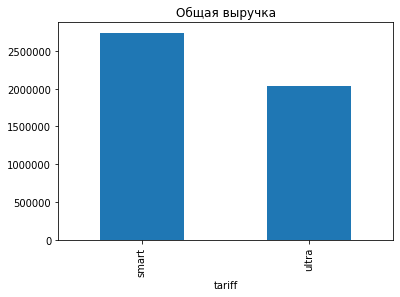

In [38]:
big_data.groupby('tariff')['money_cost'].sum().plot(kind = 'bar', title = 'Общая выручка');

Как можно увидеть, за 2018 год, пользователи тарифа **Smart** потратили больше средств, чем пользователи тарифа **Ultra**. 

Посчитаем пользователей, которые выходят за лимиты своих тарифов и платят больше.

In [39]:
big_data.query('tariff=="ultra" and money_cost >1950')['user_id'].count() #количество пользователей на тарифе Ultra, выходящие за лимиты

128

In [40]:
big_data.query('tariff=="smart" and money_cost >550')['user_id'].count() #количество пользователей на тарифе Smart, выходящие за лимиты

1625

Можно увидеть подтверждение диаграммы, случаев, выходящих за лимиты на тарифе **Smart** - 1625, а на тарифе **Ultra** в 12 с лишним разом меньше - 128 таких случаев. Можно сделать предположение, о том, что пользователи **Ultra** реже выходят за лимиты пакета.

Теперь же непосредственно перейдем к анализу звонков, сообщений и трафика.


### Анализ звонков, трафика и сообщений по тарифам

Для удобства дальнейшего исследования, разделим нашу большую сводную таблицу на два, согласно тарифам.

In [41]:
month_sum = big_data.groupby(['tariff', 'month'])['calls_count','calls_sum', 'messages', 'mb_used', 'money_cost'].sum().reset_index()

In [42]:
month_sum #проконтролируем результат

,tariff,month,calls_count,calls_sum,messages,mb_used,money_cost
0,smart,1.0,941.0,6931.0,620.0,289466.40,23925.0
1,smart,2.0,2331.0,17324.0,1397.0,672629.15,46601.0
2,smart,3.0,4183.0,30034.0,2453.0,1163020.25,85676.0
3,smart,4.0,5747.0,41119.0,3443.0,1507764.23,103066.0
4,smart,5.0,7789.0,54618.0,4762.0,2228530.99,160849.0
5,smart,6.0,9110.0,64885.0,5478.0,2590322.27,187859.0
6,smart,7.0,11402.0,82079.0,6784.0,3164373.22,233814.0
7,smart,8.0,13860.0,99045.0,7905.0,3903519.22,295540.0
8,smart,9.0,15482.0,111439.0,8746.0,4238930.49,310986.0
9,smart,10.0,17629.0,125284.0,9927.0,4926594.13,382267.0


Далее разделим результат на 2 таблицы поменьше (согласно тарифам)

In [43]:
ultra = month_sum.query('tariff=="ultra"').reset_index() 

In [44]:
ultra #проконтролируем результат

,index,tariff,month,calls_count,calls_sum,messages,mb_used,money_cost
0,12,ultra,1.0,535.0,3853.0,304.0,118266.13,17550.0
1,13,ultra,2.0,997.0,7131.0,527.0,282622.50,47400.0
2,14,ultra,3.0,2504.0,18117.0,1195.0,648815.36,74100.0
3,15,ultra,4.0,3525.0,25191.0,1736.0,925547.39,109650.0
4,16,ultra,5.0,4858.0,34192.0,2536.0,1297331.25,137700.0
5,17,ultra,6.0,5606.0,40295.0,3505.0,1589694.90,170550.0
6,18,ultra,7.0,6896.0,49667.0,4536.0,1865105.53,191850.0
7,19,ultra,8.0,7628.0,54653.0,5183.0,2094637.85,221400.0
8,20,ultra,9.0,8579.0,62036.0,6013.0,2208491.87,231450.0
9,21,ultra,10.0,9517.0,68644.0,7187.0,2465576.49,253050.0


In [45]:
smart = month_sum.query('tariff=="smart"').reset_index()

In [46]:
smart #проконтролируем результат

,index,tariff,month,calls_count,calls_sum,messages,mb_used,money_cost
0,0,smart,1.0,941.0,6931.0,620.0,289466.40,23925.0
1,1,smart,2.0,2331.0,17324.0,1397.0,672629.15,46601.0
2,2,smart,3.0,4183.0,30034.0,2453.0,1163020.25,85676.0
3,3,smart,4.0,5747.0,41119.0,3443.0,1507764.23,103066.0
4,4,smart,5.0,7789.0,54618.0,4762.0,2228530.99,160849.0
5,5,smart,6.0,9110.0,64885.0,5478.0,2590322.27,187859.0
6,6,smart,7.0,11402.0,82079.0,6784.0,3164373.22,233814.0
7,7,smart,8.0,13860.0,99045.0,7905.0,3903519.22,295540.0
8,8,smart,9.0,15482.0,111439.0,8746.0,4238930.49,310986.0
9,9,smart,10.0,17629.0,125284.0,9927.0,4926594.13,382267.0


Теперь сравним полученные две таблицы, но чтобы это было наглядно и была понятна динамика, построим гистрограммы. Чтобы облегчить работу, создадим фукнцию построения графиков, а ей уже будем передавать необходимые параметры.

In [47]:
def plot_hist(what, title): #функция построения графиков
    plt.figure(figsize=(12, 5))
    plt.bar(ultra['month'],ultra[what], alpha = 0.5, color = 'b',label='Тариф Ультра')
    plt.bar(smart['month'],smart[what], alpha = 0.5, label='Тариф Смарт')
    plt.legend(loc='upper left')
    plt.grid()
    plt.title(title)
    plt.show()

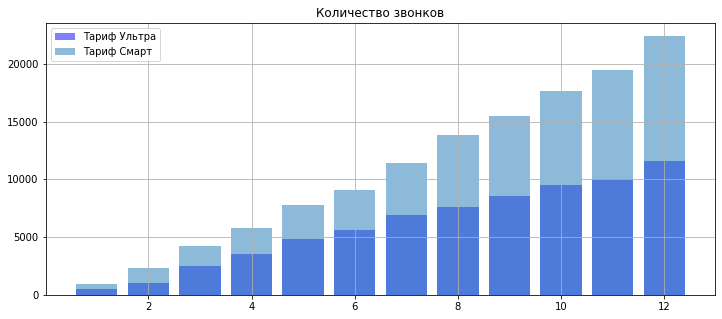

In [48]:
plot_hist('calls_count', 'Количество звонков') #вызываем функцию и передаем параметры

Можно увидеть, что количество звонков пользователи тарифа **Ultra** совершают практически в два раза меньше, чем пользователи тарифа **Smart**.

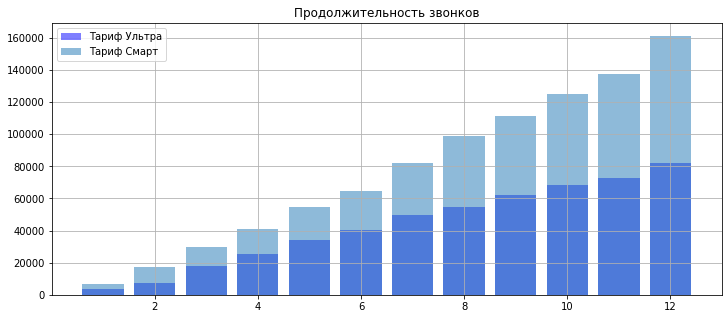

In [49]:
plot_hist('calls_sum', 'Продолжительность звонков') #вызываем функцию и передаем параметры

В разрезе продложительности звонков, наблюдаем такую же картину как и в предыдущем шаге. 

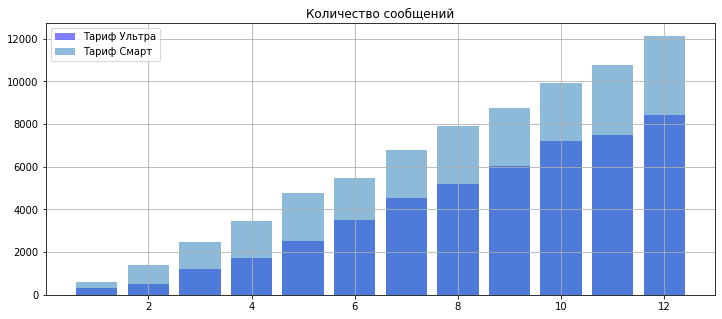

In [50]:
plot_hist('messages', 'Количество сообщений') #вызываем функцию и передаем параметры

Тут можно отметить, что в среднем, каждый пользователь тарифа **Ultra** больше используют смс, чем пользователь тарифа **Smart**. Но по общему количеству **Smart** впереди.

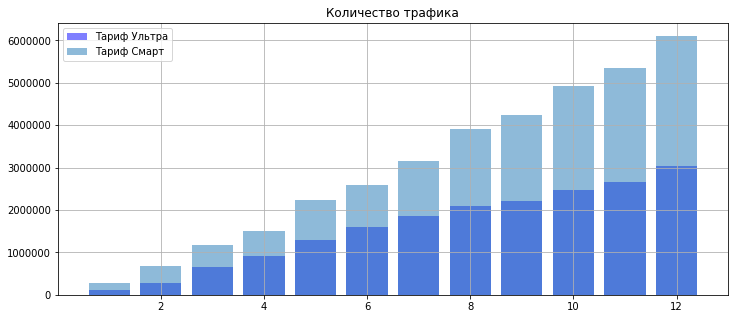

In [51]:
plot_hist('mb_used', 'Количество трафика') #вызываем функцию и передаем параметры

Как можно увидеть, тут тоже без особоых изменений. **Smart** как всегда впереди.

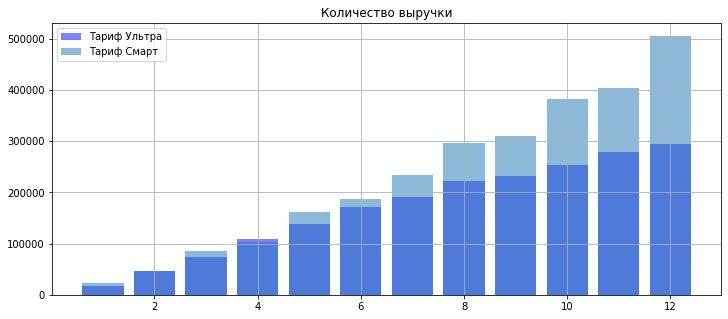

In [52]:
plot_hist('money_cost', 'Количество выручки') #вызываем функцию и передаем параметры

А вот в плане выручки, **Ultra** держит первенство, практически квартал, затем объем выручки от **Smart** постепенно растет. 

Узнаем количество пользователей тарифов, чтобы понять такую динамику.

In [53]:
users['tariff'].value_counts() #узнаем колчиество пользователей тарифов

smart    351
ultra    149
Name: tariff, dtype: int64

Из построенных графиков, можно увидеть, что по количеству звонков, их продолжительности, количеству смс, использованному трафику пользователи тарифа **Smart** впереди. Лишь по приносимой выручке, в начале года оба тарифа приносят оператору практически одинаковую сумму ежемесячно, и только во втором полугодии можно говорить об определенном доминировании тарифа **Smart**. Такой расклад в первую очередь связан с количеством клиентов на тарифах (у **Smart** их 351, а у **Ultra** - 149), и увеличением базы абонентов из периода в период. 

### Подсчет среднего и пострение графиков

Так как из-за постепенного притока абонентов невозможно опеределить месячное потребление адекватно. Целесообразно было бы взять среднее значение в месяц. Но такое среднее может быть "испорчено" выбросами, построим "ящик с усами", чтоб посмотреть выбросы значений.

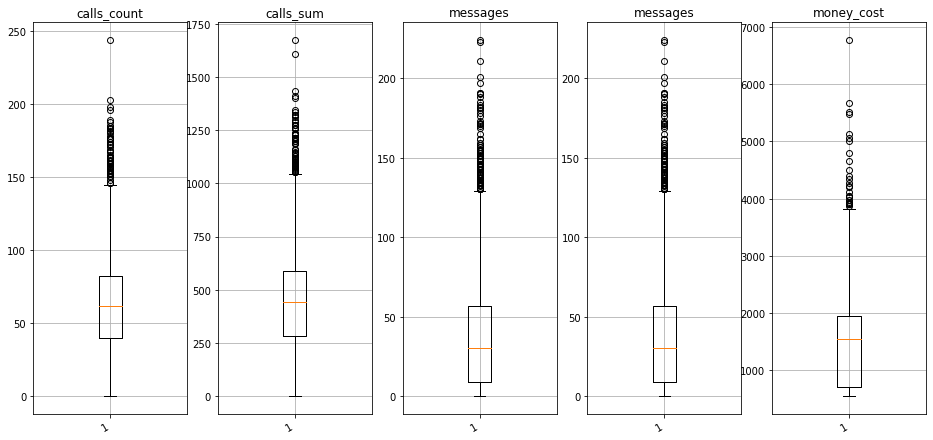

In [54]:
fig, (ax1, ax2, ax3, ax4,ax5) = plt.subplots(nrows=1, ncols=5, figsize=(16, 8)) #построим циклом 5 "усатых" ящиков для оценки выбросов
p = {ax1:'calls_count', ax2:'calls_sum', ax3:'messages', ax4:'messages',ax5:'money_cost'}
for ax in [ax1, ax2, ax3, ax4,ax5]: 
    ax.boxplot(big_data[p[ax]])
    ax.grid()
    ax.set_title(p[ax])

fig.autofmt_xdate()

По данным графикам можно судить, что сильных выбросов негативно влияющих на данные - нет. Поэтому опеределим для каждого тарифа среднее потребление и сравним на графиках.

Теперь из таблицы `big_data` несколькими шагами посчитаем средные данные по столбцам, затем сгруппируем по тарифам и "отрежем".

In [55]:
month_mean = big_data.groupby(['tariff', 'month'])['calls_count', 'calls_sum', 'messages', 'mb_used', 'money_cost'].mean().reset_index() 
ultra_mean = month_mean.query('tariff=="ultra"').reset_index()
smart_mean = month_mean.query('tariff=="smart"').reset_index()

In [56]:
ultra_mean #выведем на экран результат для контроля

,index,tariff,month,calls_count,calls_sum,messages,mb_used,money_cost
0,12,ultra,1.0,59.444444,428.111111,33.777778,13140.681111,1950.000000
1,13,ultra,2.0,41.541667,297.125000,21.958333,11775.937500,1975.000000
2,14,ultra,3.0,67.675676,489.648649,32.297297,17535.550270,2002.702703
3,15,ultra,4.0,64.090909,458.018182,31.563636,16828.134364,1993.636364
4,16,ultra,5.0,72.507463,510.328358,37.850746,19363.152985,2055.223881
5,17,ultra,6.0,66.738095,479.702381,41.726190,18924.939286,2030.357143
6,18,ultra,7.0,75.780220,545.791209,49.846154,20495.665165,2108.241758
7,19,ultra,8.0,71.289720,510.775701,48.439252,19576.054673,2069.158879
8,20,ultra,9.0,74.600000,539.443478,52.286957,19204.277130,2012.608696
9,21,ultra,10.0,77.373984,558.081301,58.430894,20045.337317,2057.317073


In [57]:
smart_mean #выведем на экран результат для контроля

,index,tariff,month,calls_count,calls_sum,messages,mb_used,money_cost
0,0,smart,1.0,27.676471,203.852941,18.235294,8513.717647,703.676471
1,1,smart,2.0,40.189655,298.689655,24.086207,11597.054310,803.465517
2,2,smart,3.0,54.324675,390.051948,31.857143,15104.159091,1112.675325
3,3,smart,4.0,51.312500,367.133929,30.741071,13462.180625,920.232143
4,4,smart,5.0,55.241135,387.361702,33.773050,15805.184326,1140.773050
5,5,smart,6.0,55.548780,395.640244,33.402439,15794.647988,1145.481707
6,6,smart,7.0,56.726368,408.353234,33.751244,15743.150348,1163.253731
7,7,smart,8.0,58.978723,421.468085,33.638298,16610.720085,1257.617021
8,8,smart,9.0,59.546154,428.611538,33.638462,16303.578808,1196.100000
9,9,smart,10.0,59.962585,426.136054,33.765306,16757.122891,1300.227891


Напишем функцию построения графиков, передадим ей необходимые параметры и выходе получим график с нужными данными.

In [58]:
def plot_hist2(what, title): #создадим функцию, рисующие графики по парметрам
    plt.figure(figsize=(12, 5))
    plt.bar(ultra_mean['month'],ultra_mean[what], alpha = 0.5, color = 'b',label='Тариф Ультра', width=0.5)
    plt.bar(smart_mean['month'],smart_mean[what], alpha = 0.5, label='Тариф Смарт')
    plt.legend(loc='upper left')
    plt.grid()
    plt.title(title)
    plt.show()

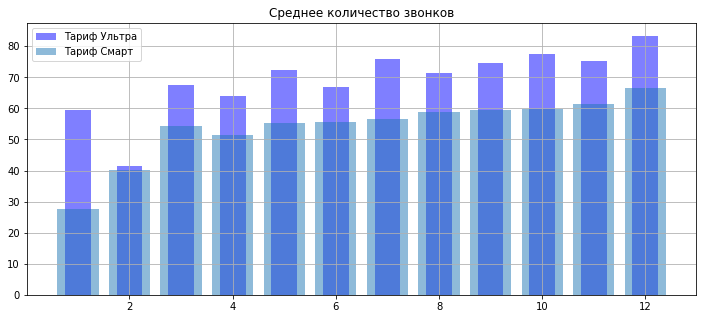

In [59]:
plot_hist2('calls_count','Среднее количество звонков') #передаем доплнительные параметры в функцию

А вот средние показатели уже отличются, так пользователи тарифа **Ultra** в среднем совершают бОльшее количество звонков чем клиенты на тарифе **Smart**.

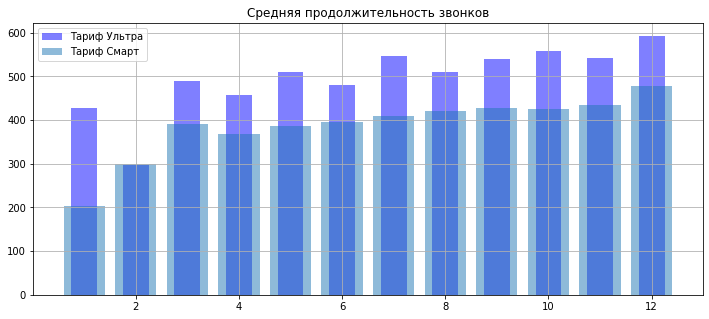

In [60]:
plot_hist2('calls_sum','Средняя продолжительность звонков') #передаем доплнительные параметры в функцию

Тут динамика не отличается от предыдущего шага, лишь в феврале показатели продолжительности сравнялись.

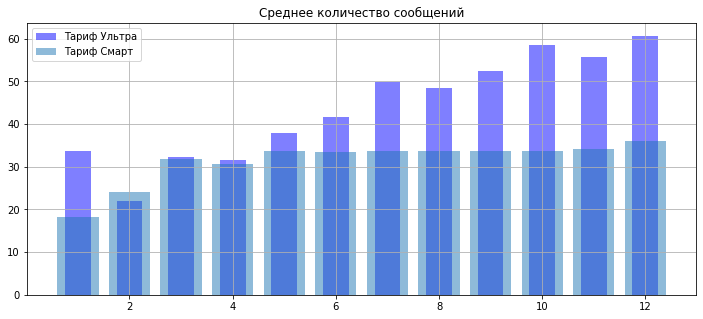

In [61]:
plot_hist2('messages','Среднее количество сообщений') #передаем доплнительные параметры в функцию

На данном графике можно увидеть, что в феврале пользователи тарифа **Smart** отправляли в среднем больше сообщений, чем на тарифе **Ultra**. Но в дальнешие месяцы наблюдается рост потребления услуги клиентов **Ultra**.

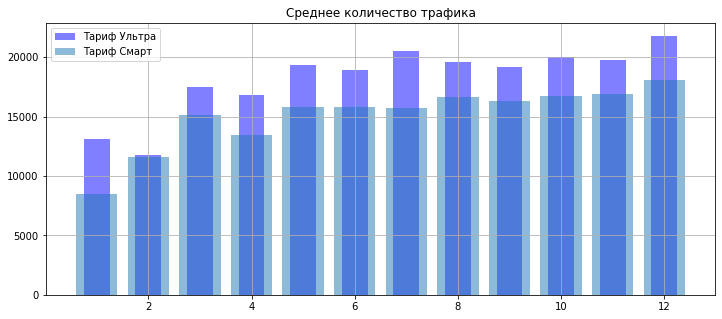

In [62]:
plot_hist2('mb_used','Среднее количество трафика') #передаем доплнительные параметры в функцию

Опять же наблюдаем преобладание потребления трафика клиентами тарифами **Ultra**, но в феврале потребление сравнялось с клиентами тарифа **Smart**.

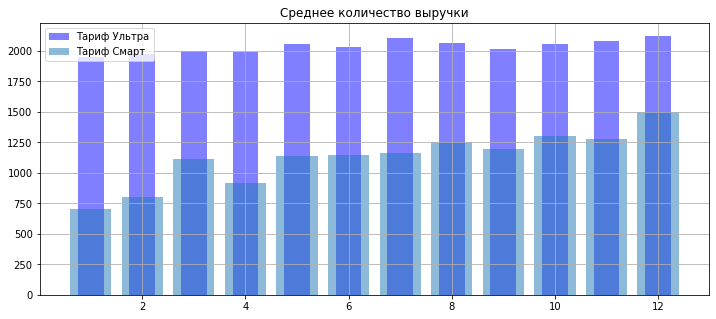

In [63]:
plot_hist2('money_cost', 'Среднее количество выручки') #передаем доплнительные параметры в функцию

В средней выручке, тут все однозначно, лидерство за тарифом **Ultra**.

Динамика средних показателей отличается от общей. Если в общем анализе мы наблюдали абсолютное преобладание клиентов тарифа **Smart**, то средние показатели отразили совсем другую картину.

### Вычисление дисперсии и отклонения, построение графиков распределения

Подсчитаем среднее, дисперсию и отклонение, для этого напишем цикл, создающий датафрейм с показателями.

In [64]:
stat = pd.DataFrame(columns = ['indicator', 'mean', 'median','var', 'std', 'tariff']) #указываем названия столбцов у такого датафрейма

count = 0 
t = ['smart', 'ultra', 'all'] 
for i in ['calls_count', 'calls_sum','messages','mb_used','money_cost']: #указываем столбцы, в которых будем искать данные
    tariff_count = 0
    for df in [smart_mean, ultra_mean, month_mean]: #указываем таблицы, с втолбцах которых будем считать
        stat.loc[count, 'indicator'] = i
        stat.loc[count, 'mean'] = round(df[i].mean(),1)
        stat.loc[count, 'median'] = round(df[i].median(),1)
        stat.loc[count, 'var'] = round(np.var(df[i], ddof=1),1)
        stat.loc[count, 'std'] = round(np.std(df[i], ddof=1),1) 
        stat.loc[count, 'tariff'] = t[tariff_count]
        count +=1
        tariff_count +=1
display(stat)

,indicator,mean,median,var,std,tariff
0,calls_count,54,56.1,109.6,10.5,smart
1,calls_count,69.1,71.9,116.7,10.8,ultra
2,calls_count,61.5,60.7,168.2,13,all
3,calls_sum,386.8,402,5221.8,72.3,smart
4,calls_sum,495.9,510.6,5998.5,77.5,ultra
5,calls_sum,441.3,431.9,8475.5,92.1,all
6,messages,31.4,33.6,26,5.1,smart
7,messages,43.7,45.1,151.8,12.3,ultra
8,messages,37.6,33.8,124.5,11.2,all
9,mb_used,15058.4,15799.9,7.13532e+06,2671.2,smart


Построим гистрограммы распределния, для оценки распределения по столбцам `calls_count`, `calls_sum`, `messages`, `mb_used`, `money_cost`. Создадим функцию и ей передаим нужные параметры. 

Тариф **Smart** - <font color="blue">будет на графике синим</font>

Тариф **Ultra** - <font color="orange">будет на графике персиковым</font>

In [65]:
def distplot(column, title): #создаем фукнцию для посторения графиков распределения
    plt.figure(figsize=(15,7))
    plt.title(title)
    sns.distplot(big_data.loc[big_data['tariff'] == "smart",column])
    sns.distplot(big_data.loc[big_data['tariff'] == "ultra",column])

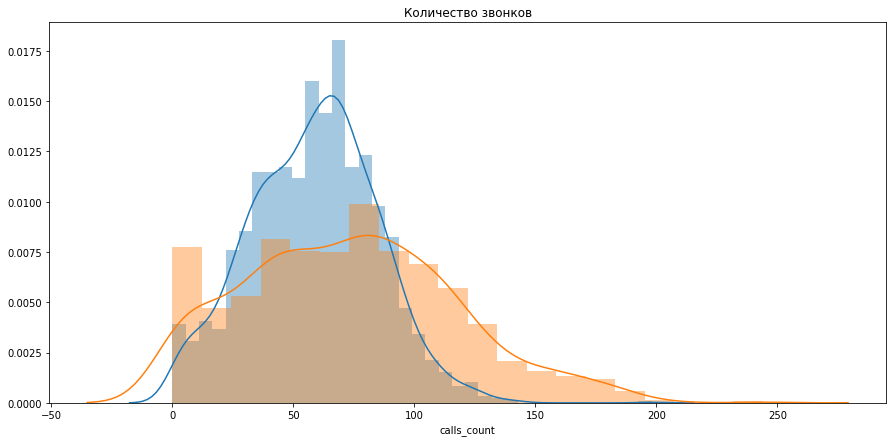

In [66]:
distplot('calls_count', 'Количество звонков') #передаем параметры и строим график

<font color="blue">Тариф **Smart**</font>  - пользователи совершают в среднем 60 звонков.

<font color="orange">Тариф **Ultra**</font> - пользователи соврешают в среднем 70 звонков, но ярких пиков, как таковых нет, распределение шире (диспресия больше), чем у другого тарифа.

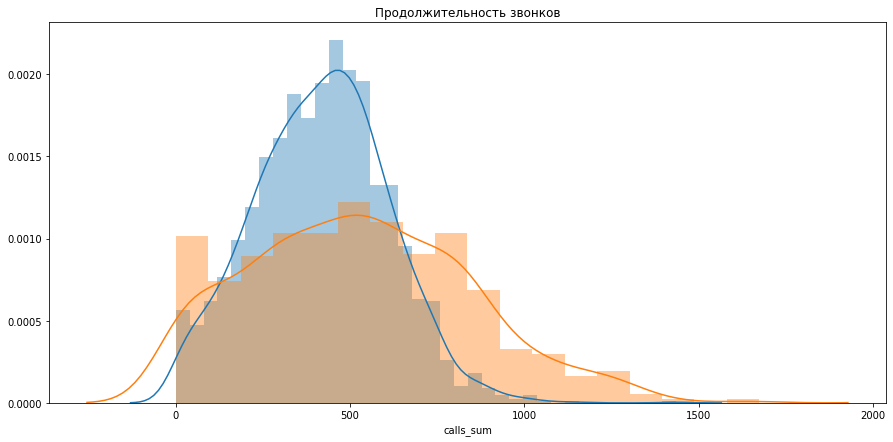

In [67]:
distplot('calls_sum', 'Продолжительность звонков') #передаем параметры и строим график

Тут можно увидеть похожесть графиков продолжительности звонка и их количества.

<font color="blue">Тариф **Smart**</font> - пользователи страются не выходить за лимит 500 минут (можно видеть равномерный подъем и резкий спуск после пика), ведь за выход за лимит приходится дополнительно оплачивать расходы. 

<font color="orange">Тариф **Ultra**</font> - пользователи не достигают лимита в 3000 минут, и не делают акцент на длительности разговора поэтому распредление шире (дисперсия больше).

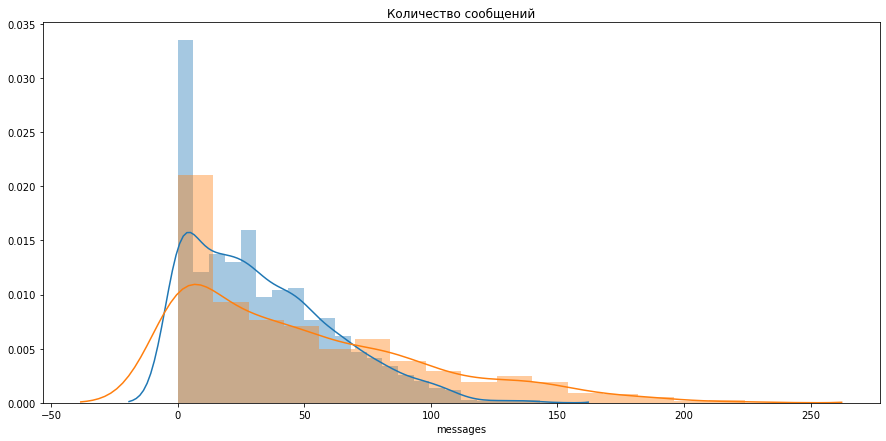

In [68]:
distplot('messages', 'Количество сообщений') #передаем параметры и строим график

<font color="blue">Тариф **Smart**</font> - пользователи реже пишут сообщения и стараются не выходить за лимит 50 сообщений в месяц.

<font color="orange">Тариф **Ultra**</font> - а тут пользователи не ограничивают себя в количестве сообщений, но за лимит в 1000 штук, не уходят.

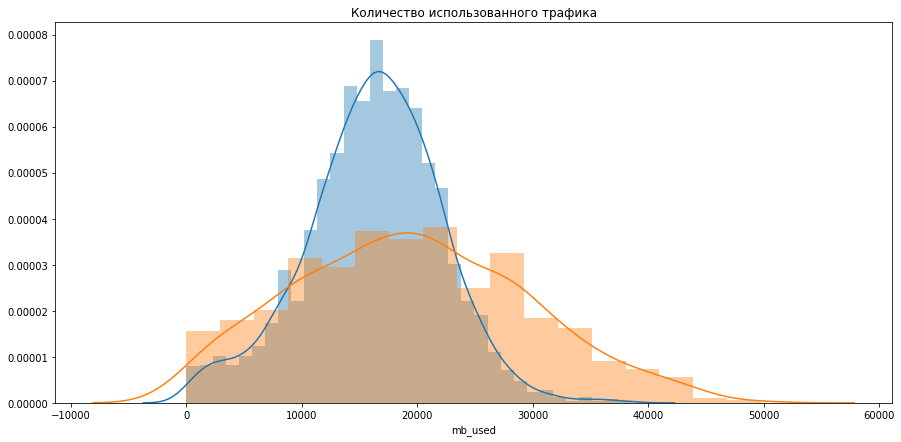

In [69]:
distplot('mb_used', 'Количество использованного трафика') #передаем параметры и строим график

Вот за что пользователи тарифа <font color="blue">**Smart**</font> в большинстве своем переплачивают, как можно увидеть достаточно большое количество людей тратит больше, чем 15360 мегабайт в месяц. Пользователи тарифа <font color="orange">**Ultra**</font> тоже выходят за свой лимит 30720 мегабайт в месяц, но достаточно редок.

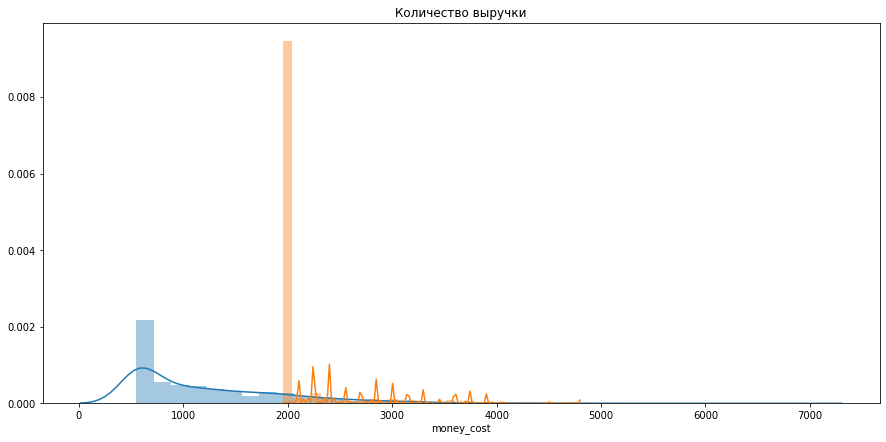

In [70]:
distplot('money_cost', 'Количество выручки') #передаем параметры и строим график


Большинство пользователей старается не выходить за лимиты и платить согласно тарифу (всплески около 550 и 1950), но есть также и те, кто выходит за рамки и платит больше (волны в районе значений 550-1950 и больше 1950). Пользователи тарифа <font color="blue">**Smart**</font> чаще платят свех лимита, чем пользователи <font color="orange">**Ultra**</font>.

### Вывод

* Звонки

Большинство клиентов **Smart** укладываются в лимит 500 минут в месяц (так медианная составляет 402 мин.). Клиенты **Ultra** практически никогда не исчерпают свой лимит в 3000 минут (у них медианная составляет 510 минут). Из-за вновь добавляющихся абонентов, можно заметить увеличение количества и продолжительности звонков. Исключение – февраль 2018 года.
* Сообщения

Редко используемая опция. Но на тарифе **Ultra**, ее используют в целом чаще, чем на **Smart** (45 сообщений против 33). Но тем не менее за лимиты **Ultra** никто так и не вышел и лишь в феврале они писали больше, чем клиенты на другом тарифе.
* Интернет

На тарифе **Smart** клиенты часто превышают лимит (медианное значение 15799.9 Мб) и превалируют в потреблении трафика, исключение лишь – февраль 2018 года. Клиенты тарифа **Ultra**, в среднем не превышают свой лимит в 30720 мегабайт (их потребление - 19283.7 Мб).

* Общая выручка

Выручка от клиентов тарифа  **Smart** выше, чем от клиентов **Ultra**. Это объясняется тем, что их количественно больше (351 против 149), а также, что они часто выходят за лимиты (1625 случаев против 128) и платят не 550 рублей в месяц, а в среднем в два раза больше 1154 рублей. А вот **Ultra**, в среднем платят 2042 рубля (при 1950 абонентской плате), что подтверждает теорию о их редко перерасходе пакетных услуг.


## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Начнем проверку гипотез, согласно анализу. Нулевая гипотеза для первого анализа будет звучать так:

**Н0 - средняя выручка пользователей тарифов «Ultra» и «Smart» равны (не различаются);**

создадим ей альтернативу:

**Н1 - средняя выручка пользователей тарифов «Ultra» и «Smart» различаются.**


Но предварительно выясним, равна ли дисперсия этих двух выборок, т.к. размеры выборок отличаются.

In [71]:
ultra_array = big_data.query('tariff =="ultra"')['money_cost'] #выберем нужные данные по тарифам
smart_array = big_data.query('tariff =="smart"')['money_cost']

In [72]:
print('Дисперсия Smart =', np.var(smart_array), '\nДисперсия Ultra =', np.var(ultra_array)) #подчистаем и выведем на экран дисперсию

Дисперсия Smart = 617400.9192561684 
Дисперсия Ultra = 125386.12841443495


Так как дисперсия отличается в практически 5 раз, то справедливо при анализе поставить параметр `equal_var=False`. Порогом примем 5% 

In [73]:
alpha = 0.05 
results = st.ttest_ind(ultra_array, smart_array, equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.5653876591790328e-299
Отвергаем нулевую гипотезу


С уверенностью можно сказать, гипотеза **Н0** о равенстве средней выручке двух тарифов - отверагется. 

Как мы наблюдали в предыдущих шагах, средние значения выручки по тарифам различаются почти в 2 раза. Если у пользователя подключен тариф "Smart" с абонентской платой в 550 рублей, то он скорее всего по итогам месяца заплатит гораздо больше из-за нехватки услуг в рамках тарифного пакета. А у пользователей "Ultra" это значение тяготеет к ежемесячной плате.

### Cредняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов

Сформируем гипотезы:

**Н0-средняя выручка пользователи из Москвы равна (не отличаются) выручке пользователей из других регионов**

альтернатива бужет звучать так:

**Н1-средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов**

По аналогии с предыдущим шагом, пронализируем.

In [74]:
moscow_array = big_data.query('city =="Москва"')['money_cost'] #выберем нужные данные по тарифам
regions_array = big_data.query('city !="Москва"')['money_cost']

Определим для них значение дисперсии, для определения схожести выборки:

In [75]:
print('Дисперсия города Москвы =', np.var(moscow_array), '\nДисперсия регионов =', np.var(regions_array))

Дисперсия города Москвы = 545295.0592653508 
Дисперсия регионов = 629013.8839591661


Дисперсия не отличается в несколько раз, как в предыдщуем шаге, но тем не менее, она не равна. Значит параметр примет значение `equal_var=False`. Порогом также будет значение 5%.

In [76]:
alpha = 0.05 
results = st.ttest_ind(moscow_array, regions_array, equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.4650068964187739
Не отвергаем нулевую гипотезу


Тут результат отличается от первого теста, и он не позволяет отвергнуть нулевую гипотезу, что доходы от пользователей из Москвы и из других регионов равны. Выручка в Москве практически не отличаются от других населенных пунктов.

### Вывод

Нами были проверены две гипотезы:

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


Гипотеза 1 подтвердилась и говорит нам о том, что выручка по тарифам отличается.

Гипотеза 2 была опровергнута, и говорит о том, что выручка от клиентов в Москве не отличается от клиентов в других регионах.

## Общий вывод

* Данные

Данные в исходных датафреймах были корректными, неадекватных пропусков не было, дубликатов тоже не нашли, мы лишь привели даты в столбцах к правильному типу данных. Сформировали одну большую сводную таблицу из нескольких, рассчитали искомые показатели и представили их наглядно на графиках.

* Звонки

Большинство клиентов **Smart** укладываются в лимит 500 минут в месяц (так медианная составляет 402 мин.). Клиенты **Ultra** практически никогда не исчерпывают свой лимит в 3000 минут (у них медианная составляет 510 минут). Надо отметить, что в тарифе **Smart** в январе и феврале мало звонят - в 1,5-2 раза меньше, чем в другие месяцы, это можно списать на вновь добавляющихся абонентов на протяжении года. Можно отметить, что расход минут постепенно возрастает из месяца в месяц.

* Сообщения

Редко используемая опция. Но на тарифе **Ultra**, ее используют в целом чаще, чем на **Smart** (45 сообщений против 33). Но тем не менее за лимиты **Ultra** никто так и не вышел. В феврале клиенты **Ultra** писали больше, чем клиенты на другом тарифе.

* Интернет

На тарифе **Smart** клиенты часто превышают лимит (медианное значение 15799.9 Мб) и превалируют в потреблении трафика, исключение лишь – февраль 2018 года. Клиенты тарифа **Ultra**, в среднем не превышают свой лимит в 30720 мегабайт (их потребление - 19283.7 Мб).

* Общая выручка

Выручка от клиентов тарифа  **Smart** выше, чем от клиентов **Ultra**. Это объясняется тем, что они часто выходят за лимиты и платят не 550 рублей в месяц, а в среднем в два раза больше 1154 рублей. А вот **Ultra**, в среднем платят 2042 рубля (при 1950 абонентской плате), что подтверждает теорию о их редком перерасходе пакетных услуг. 

Также мы проверели две гипотезы:

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Эта гипотеза подтвердилась, так выручка от пользователей тарифа  **Smart** выше, чем от пользователей **Ultra**.

2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Эта гипотеза была опровергнута, и говорит о том, что выручка от клиентов в Москве не отличается от клиентов в других регионах.


В конечном итоге можно направить силы  маркетинга для продвижения тарифа  **Smart**. Во-первых он привлекателей для пользователей с точки зрения абонентской платы (550 рублей против 1950). Во-вторых он приносит больше выручки для оператора, т.к. пользователи **Ultra** не исчерпывают свои лимиты и соответственно не доплачивают за доп. услуги. 